# Programování pro střední školy

## Lekce 7: Strukturované programování

V minulé lekci jste procházeli pomocí podprogramů (funkce nebo procedury) vytvářeli opakovatelné jednotky chování, které lze spojovat za účelem komplexního chování programů. V této lekci se podíváme na to, jak organizovat typický program pomocí podprogramů, který čte data ze souboru, zpracuje je a vykreslí na obrazovku grafický výstup v podobě grafu. Tím byste měli být plně gramotní v základech programování a používat tyto dovednosti pro řešení problémů z oblasti techniky a vědy po dobu Vašeho studi.


### Téma 7.1 Čtení ze souboru

Pro čtení ze souboru používáme konstrukci `with open(název_souboru, mód) as ukazatel_na_soubor`. `with` je příkaz, který Vám umožní snadnou práci se souborem. Bez něj bychom museli řešit situace jako uzavření souboru, smazání dat z mezipaměti a podobné nepříjemné záležitosti. 

Příkaz `open` otevírá datový soubor s uvedeným názvem. Název může být absolutní cesta k souboru (např.: C:ProgramFiles/...) nebo relativní cesta od sešitu s kódem (např.: ../../data/data.txt, což znamená o dvě složky výše v adresáři data nalezneš soubor data.txt). V našem případě budeme pracovat s nejjednodušší varianout a to je jen uvedení názvu souboru, který se musí nacházet vedle našeho sešitu se zdrojovým kódem.

Za uvedením cesty k souboru je nutné napsat tzv. mód přístupu k souboru. Zde se pomocí písmenek uvádí, zda chceme ze souboru číst, zapisovat nebo připisovat. Pro čtení se použije písmenko `"r"`. 

Po ukončení příkazu open následuje příkaz `as ukazatel_na_soubor`, kde `ukazatel_na_soubor` je námi libovolně zvolný validní název proměnné. Tato speciální proměnná nám umožňuje komunikaci s otevřeným soubore a skrze ní budeme provádět operace jako zápis nebo čtení. Proměnná nám vlastně soubor zastupuje (ukazuje na něj, proto ukazatel).

Po vytvoření ukazatele následuje dvojtečka, kde odsazeně píšeme příkazy, které se dějou v rámci toho, kdy je soubor otevřen. Nejčastěji zde načteme celý obsah souboru do proměnné. Po ukončení odsazení (konec bloku) se soubor uzavře a již s ním nemůžeme komunikovat. Museli bychom ho znovu otevřít celou sekvencí příkazu with.

Vytvořte si prázdný soubor známky.txt ve stejném adresáři, jako máte tento sešit, a vložte do něj následující text (nezapomeňte soubor uložit). Pokud pracujete v Google Colab prostředí, tak soubor musíte nahrát do adresáře, jehož ikonku naleznete po levé straně. Po otevření ikonky adresáře je nutné kliknout ještě na ikonku souboru se šipkou v horní části s nápovědou při najetí: "nahrát do úložiště relace".

```
Petr:1,2,1,1,2
Jana:1,3,2,2,1
Michal:4,3,1,1,3
```

Následující kód soubor otevře a načte jeho obsah do proměnné `text_souboru`. Poté pomocí `for` cyklu projde každý řádek souboru (rozdělené znakem pro nový řádek `\n`) a vypíše ho na obrazovku.

In [1]:
with open("známky.txt", "r") as soubor:
    text_souboru = soubor.read()

for radek in text_souboru.split("\n"):
    print(radek)

Petr:1,2,1,1,2
Jana:1,3,2,2,1
Michal:4,3,1,1,3


Pokud bych potřeboval (a často potřebuji) data na řádcích dále dělit, tak mohu během procházení řádků dále dělit sepátorem.

In [2]:
with open("známky.txt", "r") as soubor:
    text_souboru = soubor.read()

for radek in text_souboru.split("\n"):
    rozdeleny_radek = radek.split(":")
    jmeno = rozdeleny_radek[0]
    znamky = rozdeleny_radek[1]
    print(f"{jmeno=}, {znamky=}")


jmeno='Petr', znamky='1,2,1,1,2'
jmeno='Jana', znamky='1,3,2,2,1'
jmeno='Michal', znamky='4,3,1,1,3'


Data ze souboru pak typicky ukládáme do nějakých vhodnách datových typů v jazyce Python. Nejčastěji různé kolekce (vy však umíte pracovat jen se seznamem). Ukážeme si, jak bychom mohli uložit data do nové kolekce, která se jmenuje slovník. Slovník se chová podobně jako seznam, avšak klíčem nemusí být jen číselný index, ale může jim být například i řetězec. Slovník poznáte podle složených závorek.

In [3]:
znamky_tridy = {}

with open("známky.txt", "r") as soubor:
    text_souboru = soubor.read()

for radek in text_souboru.split("\n"):
    rozdeleny_radek = radek.split(":")
    jmeno = rozdeleny_radek[0]
    znamky = rozdeleny_radek[1]
    znamky_tridy[jmeno] = znamky #zde se vytvoří nová dvojice hodnot do slovníku (klíčem k výběru je jméno)

print(znamky_tridy)

{'Petr': '1,2,1,1,2', 'Jana': '1,3,2,2,1', 'Michal': '4,3,1,1,3'}


Pokud bych chtěl ze slovníku vypsat konkrétní položku, pak uvedu klíč do hranatých závorek a vrátí se mi uložená hodnota.

In [4]:
print(znamky_tridy["Jana"])

1,3,2,2,1


Pokud chcete projít celý slovník, pak je výhodné použít metodu slovníku s názvem items. Ten vrací pro všechny záznamy ve slovníku klíč a hodnotu.

In [5]:
#   klic   hodnota
for jmeno, znamky in znamky_tridy.items():
    print(f"{jmeno} má znamky {znamky}")

Petr má znamky 1,2,1,1,2
Jana má znamky 1,3,2,2,1
Michal má znamky 4,3,1,1,3


Pamatujte si jedno pravidlo! Klíč se musí nacházet ve slovníku právě jednu. Pokud by se nacházel víckrát, pak Python neví, jakou hodnotu vrátit.

In [9]:
znamky_tridy = {}
znamky_tridy["Pavel"] = [5,5,4]
znamky_tridy["Pavel"] = [1,3,2]

print(znamky_tridy["Pavel"]) # ted je chaos v tom, jestli se má vrátít [5,5,4] nebo [1,3,2]

[1, 3, 2]


#### Cvičení 7.1.1: Načtení řádků souboru

Mějme následující vstupní soubor do našeho programu:
```
Skupina1-Pavel,Michal,Richard
Skupina2-Alena,Jana,Martin
Skupina3-Jaroslav,Martina,Anna
```

Vaším úkolem je soubor otevřít, přečíst řádky a vypsat je na obrazovku.

#### Cvičení 7.1.2: Získání konkrétních řádků

Mějme následující vstupní soubor do našeho programu:
```
Skupina1-Pavel,Michal,Richard
Skupina2-Alena,Jana,Martin
Skupina3-Jaroslav,Martina,Anna
```

Vaším úkolem je soubor otevřít, přečíst řádky a vypsat jen řádek se skupinou 2.

#### Cvičení 7.1.3: Načtení tabulkových dat

Mějme následující vstupní soubor do našeho programu:
```
Skupina1,Skupina2,Skupina3
Pavel,Alena,Jaroslav
Michal,Jana,Martina
Richard,Martin,Anna
```

Takový formát dat se nachází v souborech s příponou .CSV (comma-separated values) a představuje způsob, jak ukládáme tabulková data, která se nachází v tabulkových procesorech jako je např.: Microsoft Excel nebo Google Tabulky. První řádek představuje nadpisy sloupců. Ostatní řádky obsahují samotná data tabulky. Například první sloupec má název Skupina1 a obsahuje v sobě data Pavel, Michal, Richard.
  
Vaším úkolem je soubor otevřít a najít v jakém řádku a sloupci se nachází Martina. Musíte na to přijít algoritmem.

#### Cvičení 7.1.4: Načtení tabulkových dat v .csv formátu

Vytvořte si v Excelu nějakou jednoduchou tabulku, exportujte si ji do .CSV formátu a otevřete si ji v Pythonu. Tabulku vyplňte následujícími hodnotami:
```
Hra,2.A, 2.B, 3.C
Rocket League,1,2,3
Valorant,2,1,3
League of Legeneds,3,2,1
Fifa,1,3,2
```

Jedná se o tabulku umístění v turnaji pro jednotlivé třídy. Tabulku v Pythonu zpracujte a vypište na obrazovku následující informace:
1. Která třída byla první v Rocket League?
2. Která třída byla první ve Valorantu?
3. Která třída byla první v League of Legends?
4. která tříd abyla první ve Fifě?

### Téma 7.2: Zápis do souboru

Pro zápis do souboru používáme opět stejnou konstrukci `with open(název_souboru, mód) as ukazatel_na_soubor`. Rozdíl bude v tom, že modifikátorem přístupu pro psaní je tentokrát písmenko `"w"`. Pokud soubor se zadaným názvem neexistuje, tak ho příkaz write vytvoří. Pozor! Pokud soubor již existuje, tak bude přepsán.

Pojďme si ukázat, jak zapsat do souboru dva seznamy slov.

In [1]:
mesta = ["Praha", "Brno", "Ostrava", "Ústí nad Labem", "Litoměřice"]
pokrmy = ["Svíčková", "Guláš", "Smažený sýr", "Kuře na smetaně", "Fazole v chilli omáčce"]

with open("data.txt", "w") as soubor:
    soubor.write("Města: ")
    for mesto in mesta:
        soubor.write(mesto + " ")
    soubor.write("\n") #prázdný řádek pro oddělení
    soubor.write("Pokrmy: ")
    for pokrm in pokrmy:
        soubor.write(pokrm + " ")

Pokud bychom chtěli připsat data do existujícího souboru, pak využijeme modifikátor `"a"`. Pokud by soubor neexistoval, tak bude také vytvořen jako v případě modifikátoru `"a"`. Modifikátor `"a"` samozřejmě původní soubor nemaže, to by ani nešlo připisovat.

Vytvořte si textový soubor s následujícím obsahem (název soubor bude např.: moje_info.txt):
```
Jméno: Jan
Příjmení: Novák
Věk: 18
Email: novjan@czmail.com
```

Následující program do něj připíše nový řádek aniž by původní soubor smazal. Speciální symbol \n je tam z toho důvodu, aby se text nezapsal na poslední řádek, ale na nový řádek za posledním (\n je symbol pro zalomení na nový řádek).

In [2]:
with open("moje_info.txt", "a") as soubor:
    soubor.write("\nTel: 123456789")

V následujícím kódu otevřu již existující soubor, přečtu z něj všechna data a připíšu je do jiného souboru.

In [ ]:
with open("data.txt", "r") as soubor:
    text = soubor.read()

with open("moje_info.txt", "a") as soubor:
    soubor.write("\n")
    soubor.write(text) 

#### Cvičení 7.2.1: Zápis dat na jeden řádek do souboru

Vytvořte si následující kolekci jmen:
```
jmena = ["Jana", "Petr", "Alex", "Jarmila", "Martin"]
```

Do souboru s názvem "jmena.txt" uložte všechna jmena ze seznamu na jeden řádek oddělená čárkou.



#### Cvičení 7.2.2: Zápis dat do řádků

Vytvořte si následující kolekci jmen:
```
jmena = ["Jana", "Petr", "Alex", "Jarmila", "Martin"]
```

Do souboru s názvem "jmena2.txt" uložte všechna jmena ze seznamu zvlášť každé na nový řádek.

#### Cvičení 7.2.3: Zápis dat v tabulkovém formátu

Vytvořte si následující kolekci jmen:
```
jmena = ["Jana", "Petr", "Alex", "Jarmila", "Martin"]
```

Do souboru s názvem "jmena.csv" uložte všechna jmena ze seznamu jako tabulku. Tabulka bude mít 2 sloupce - pořadí jména a jméno. Výsledek by měl vypadat takto:
```
Pořadí,Jméno
1,Jana
2,Petr
3,Alex
4,Jarmila
5,Martin
```

#### Cvičení 7.2.4: Připisování dat do souboru

Pokud se Vám podařilo vyřešit předchozí cvičení, tak do Vámio vytvořeného souboru "jmena.csv" připište dva nové řádky:
```
6,Richard
7,Lucie
```

Otevřete si následně Vámi vytvořený soubor s tabulkovém procesu Microsoft Excel nebo Google Tabulky a zobrazte si ho.

### Téma 7.3: Vykreslování dat

Další užitečnou schopností je umět vykreslovat data ze souboru do grafů. Uložte si do souboru data.txt následující obsah:
```
čas,teplota včera, teplota dnes
0,5,5
1,6,7
2,6,7
3,7,7
4,8,8
5,8,9
6,10,11
7,12,13
8,14,15
9,16,18
10,17,19
11,17,20
12,18,21
13,17,20
14,18,20
15,17,21
16,15,20
17,13,19
18,13,17
19,12,16
20,9,15
21,7,12
22,6,10
23,6,7
```

Tato dat si nejprve načteme do kolekce. Poté si naimportujeme si modul matplotlib.pyplot pod zkrácenou přezdívkou (aliasem) plt. Poté zavoláme příkaz plot, kde zadáme, jaká data chceme na osu x a y a zvolíme barvičku se stylem. Pokud tvoříme více liniových grafů, tak je voláme za sebou. Příkazem show zobrazíme výsledný graf s liniemi.

In [ ]:
!pip install matplotlib # tenhle příkaz spusťte jen v případě, že nepracujete v Google Colab. Raději si zavolejte učitele pro asistenci.

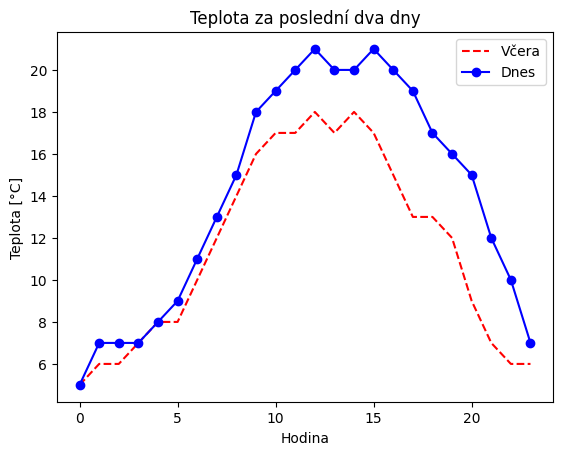

In [7]:
import matplotlib.pyplot as plt #import knihovny pro vykreslování grafů pod aliasem plt

teplota_vcera = []
teplota_dnes = []
casy = []

with open("data.txt", "r") as soubor:
    text = soubor.read()

#prikaz enumerate vraci dve hodnoty - cislo radku a obsah radku
for iradek, radek in enumerate(text.split("\n")):
    if iradek == 0: #prvni radek chceme preskocit, jelikoz obsahuje nadpisy a ne data
        continue
    cas, teplota1, teplot2 = radek.split(",") #na radku jsou tri hodnoty oddelene carkou
    casy.append(int(cas))
    teplota_vcera.append(int(teplota1))
    teplota_dnes.append(int(teplot2))

plt.title("Teplota za poslední dva dny") #nadpis grafu
plt.xlabel("Hodina") #popisek osy x
plt.ylabel("Teplota [°C]") #popisek osy y
plt.plot(casy, teplota_vcera, "r--", label="Včera") #vykresleni grafu
plt.plot(casy, teplota_dnes, "bo-", label="Dnes") #vykresleni grafu
plt.legend() #zobrazeni legendy
plt.show() #zobrazeni grafu

Matplotlib má spousty dalších předpřipravených grafů, které můžete využít. Příkladem je scatter plot, ve kterém je snadno vidět korelace (souvislost) dat. Následující program načte ze souboru s reálnými daty hodnoty výšky a váhy 18 letých studentů. Poté je zobrazí na 2D ploše, kde souřadnice jsou vlastnosti, které nás zajímají (výška, váha). Z takového grafu lze usuzovat na hypotézy typu: je pravdě, že čím jsou obecně lidé vyšší, tak jsou i těžší?

Pokud si chcete kód spustit, tak potřebný soubor naleznete v repozitáři s kódy. Nebo ho naleznete na této stránce:
https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset 

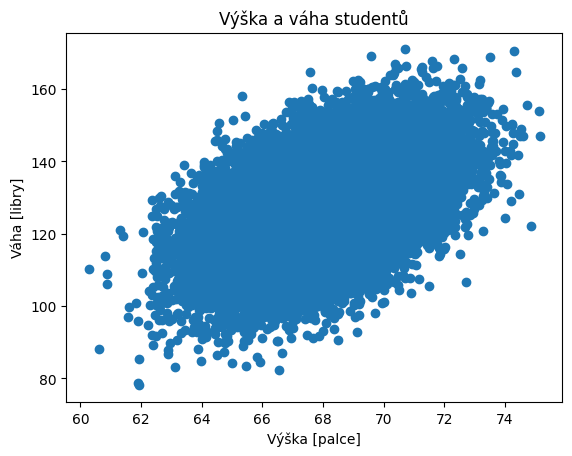

In [11]:
with open("vyska_vaha.csv", "r") as soubor:
    text = soubor.read()

vyska = []
vaha = []

for iradek, radek in enumerate(text.split("\n")):
    if iradek == 0:
        continue
    rozdeleny_radek = radek.split(",")
    vyska.append(float(rozdeleny_radek[1]))
    vaha.append(float(rozdeleny_radek[2]))

plt.title("Výška a váha studentů") #nadpis grafu
plt.xlabel("Výška [palce]") #popisek osy x
plt.ylabel("Váha [libry]") #popisek osy y
plt.scatter(vyska, vaha) #vykresleni grafu
plt.show() #zobrazeni grafu

Dalším zajímavým grafem je histogram, který ukazuje počet zastoupení dané hodnoty v populaci. Na ose x je hodnota vlastností (například hmotnost) a na ose y počet takových záznamů. Různorodé hodnoty jsou rozsekány do menších dílků a zařazeny do dílků.

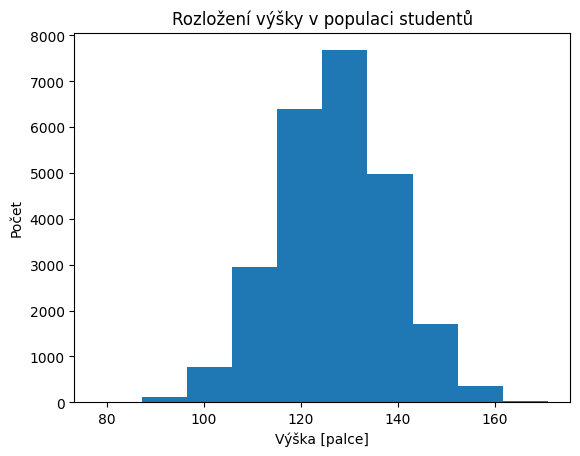

In [13]:
with open("vyska_vaha.csv", "r") as soubor:
    text = soubor.read()

vyska = []

for iradek, radek in enumerate(text.split("\n")):
    if iradek == 0:
        continue
    rozdeleny_radek = radek.split(",")
    vyska.append(float(rozdeleny_radek[1]))

plt.title("Rozložení výšky v populaci studentů") #nadpis grafu
plt.xlabel("Výška [palce]") #popisek osy x
plt.ylabel("Počet") #popisek osy y
plt.hist(vaha) #vykresleni grafu
plt.show() #zob#### Cvičení 7.3.2: Vykreslení grafu ze souboru

#### Cvičení 7.3.1: Úprava z imperiálních na SI jednotky

Upravte kód, který vykresluje histogram nebo scatterplot tak, aby jednotky byly v soustavě SI (metry a kilogramy).

#### Cvičení 7.3.2: Vykreslení grafu ze souboru

Stáhněte si z Kaggle.com nějaký zajímavý dataset a zobrazte si ho v grafu.

### Téma 7.4: Strukturování programu

Toto téma v sešitech už jednou zaznělo. Pojďme si ho na závěr pro jeho důležitost ještě jednou zopakovat. 

Největší starostí během programování v praxi nebývá to, jak program napsat, ale jak ho po napsání udržovat. Pokud program právě píšete, tak mu s velkou pravděpodobností rozumíte. Každý řádek ve Vaše kódu má nějaký zamýšlený účel. Až se podíváte na kód za nějakou dobu, tak se Vám tyto účely každého řádku vymažou z paměti. V praxi však musíte čas od času kód dále upravovat a rozšiřovat, což se dělá velmi špatně, když svému kódu již nerozumíte.

Řešení jsou následující:
1. Kód si hodně komentujte, v komentáři popisujte myšlenky a ne vysvětlení příkazů.
2. Kód si vhodně rozložte (dekomponujte) do podprogramů, kde každý podprogram má svůj jasně vymezený účel, který je zjistitelný z názvu.
3. Používejte dokumentační řetězce a napovídání typů.
4. Používejte generativní umělou inteligenci pro vysvětlení Vašeho kódu.

Zkuste psát ode dneška kódy tak, ať jim vždy v budoucnu rozumíte.

V následující cvičení vidíte dva stejné kódy. Porovnejte, který bude asi více udržitelný.

In [2]:
from typing import List
from string import ascii_lowercase
from random import choice


def nevim(a, b):
    s = []
    for i in range(b):
        s.append(i if i % a == 0 else choice(ascii_lowercase))


def generuj_delitelna_cisla_a_pismena(delitelnost: int, max_cislo: int) -> List[int, str]:
    """Generuje seznam celých čísel dělitelných zadaným paramatrem a náhodná písmena.

    Argumenty:
        delitelnost (int): Naplní seznam čísly, která jsou dělitelná tímto číslem.
        max_cislo (int): Mez generování. Čísla vyšší než toto se v navrácené kolekci nevyskytnou.

    Vrací:
        List[int, str]: Seznam čísel dělitelných parametre beze zbytku a náhodných písmen.
    """
    cisla_s_pismeny = []

    #generuj čísla až do zadaného maximálního čísla (nevčetně)
    for cislo in range(max_cislo):
        #přidej číslo, které je na řadě, pokud je dělitelné beze zbytku parametrem dělitelnost
        #  v opačném případě vyber náhodné písmeno z abecedy malých písmen
        cisla_s_pismeny.append(cislo if cislo % delitelnost == 0 else choice(ascii_lowercase))



Dále je ukázka dekompozice kódu. Tělo nevyplňuji pro vyšší přehlednost.

In [ ]:
#podprogram, který ověří, zda je vstup číslo
def je_vstup_cislem(cislo) -> bool:
    ...


#podprogram nacte zadany pocet hodnot a overuje, zda je kazda z nactenych hodnot cislem
def nacti_hodnoty(pocet_hodnot) -> List[int]:
    ...
    je_vstup_cislem(cislo) #volani podprogramu z podprogramu
    ...


#vynasobi hodnoty nahodnym cislem
def vynasob_hodnoty(hodnoty: List[int]) -> int:
    ...


#vypis hodnoty na obrazovku
def vypis_vysledek(vysledek):
    ...


def main(): #hlavní program, tady začíná čtení našeho kódu
    vstupni_hodnoty = nacti_hodnoty(pocet_hodnot=2)
    vynasobene_hodnoty = vynasob_hodnoty(vstupni_hodnoty)
    vypis_vysledek(vynasobene_hodnoty)


main() #spuštění hlavního programu

### Domácí Úkoly 7 - Příprava na závěrečný projekt

V této přípravě vidíte několik vyřešených úloh tak, jak bych je vyřešil s Vaší úrovní znalostí já. Nemusíte se toho držet a klidně si úkoly vyřešte ve svém stylu pokud na to máte čas. Pokud čas nemáte, tak si úlohy a mé řešení alespoň řádně prostudujte.

#### Úkol 7.1 Načti matici, ulož matici

Mějme textový soubor s následujícím obsahem:

```
1 5 6
2 7 9
9 0 2
```

Vaším úkolem je načíst všechna čísla ze souboru, vynásobit je zvolený číslem a zapsat zpátky do původního souboru.

In [14]:
!echo "1 5 6" > ukol1.txt
!echo "2 7 9" >> ukol1.txt
!echo "9 0 2" >> ukol1.txt

In [15]:
from typing import List


def nacti_cisla(cesta: str) -> List[List[int]]:
    with open(cesta, "r") as soubor:
        text = soubor.read().strip()
    matice_cisel = []
    for cisla in text.split("\n"):
        matice_cisel.append(list(map(int, cisla.split(" "))))
    return matice_cisel


def vynasob_matici_cislem(matice: List[List[int]], cislo: float) -> List[List[int]]:
    for radek in matice:
        for iprvek in range(len(radek)):
            radek[iprvek] *= cislo
    return matice


def zapis_matici_do_souboru(matice: List[List[int]], cesta: str) -> None:
    with open(cesta, "w") as soubor:
        for radek in matice:
            for cislo in radek:
                soubor.write(str(cislo) + " ")
            soubor.write("\n")


def main():
    matice_cisel = nacti_cisla("ukol1.txt")
    matice_cisel = vynasob_matici_cislem(matice_cisel, cislo=5)
    zapis_matici_do_souboru(matice_cisel, cesta="ukol1.txt")


main()

#### Úkol 7.2 Odděl psy od koček

Mějme textový soubor s následujícím obsahem:

```
rex,micka,ronald,natálka,jonatán,zoltán
azor,kulička,ocásek,fousek,strašpytel,zimík
simona,maňas,nána,otakar,jeliman,krávoslav
```

V souboru se nachází jména koček a psů. Psa od kočky poznáte podle počátečního písmena jména.

* Psi začínají písmenem: `a, j, k, o, z`.
* Kočky začínají písmenem: `f, m, n, r, s`.

Vaším úkolem je načíst text ze souboru a získat z nich jména psů a koček. Vytvořte si pro každý typ zvířete seznam jmen, do kterých budete jména postupně přidávat. Tyto seznamy pak zvlášť zapíšete do souborů. Každý typ zvířete bude mít vlastní soubor se jmény.

In [16]:
!echo "rex,micka,ronald,natálka,jonatán,zoltán" > ukol2.txt
!echo "azor,kulička,ocásek,fousek,strašpytel,zimík" >> ukol2.txt
!echo "simona,maňas,nána,otakar,jeliman,krávoslav" >> ukol2.txt

In [ ]:
from typing import List, Tuple

def nacti_jmena_ze_souboru(cesta: str) -> List[str]:
    jmena = []
    with open(cesta, "r") as soubor:
        for radek in soubor.split("\n"):
            for jmeno in radek.split(","):
                jmena.append(jmeno)
    return jmena


def roztrid_jmena(jmena: List[str], pismena_psu: List[str], pismena_kocek: List[str]) -> Tuple[List[str]]:
    psi = []
    kocky = []
    for jmeno in jmena:
        if jmeno[0] in pismena_psu:
            psi.append(jmeno)
        elif jmeno[0] in pismena_kocek:
            kocky.append(jmeno)
    return psi, kocky


def zapis_jmena_do_souboru(cesta_psi: str, cesta_kocky: str, jmena_psu: List[str], jmena_kocek: List[str]) -> None:
    with open(cesta_psi, "w") as soubor:
        for jmeno in jmena_psu:
            soubor.write(jmeno + ",")

    with open(cesta_kocky, "w") as soubor:
        for jmeno in jmena_kocek:
            soubor.write(jmeno + " ")


def main():
    jmena_zvirat = nacti_jmena_ze_souboru(cesta="ukol2.txt")
    jmena_psu, jmena_kocek = roztrid_jmena(jmena_zvirat, pismena_psu=["","","",""], pismena_kocek=[])
